In [1]:
## imports 
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import LSTM
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical

In [2]:
from bs4 import BeautifulSoup
import requests
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# url = "https://ansible.uk/misc/15K-Striking.html"

# # url = 'https://example.com/' # Replace with the URL of the webpage you want to scrape

# response = requests.get(url)

# soup = BeautifulSoup(response.text, 'html.parser')
# list_items = soup.find_all('li')
# all_sentences = []
# for li in list_items:
#     all_sentences.append(li.text.strip())
#     print(li.text.strip())
all_sentences = []
with open('Data/simile.txt','r',encoding = 'utf8') as story:
    all_sentences = story.readlines()
all_sentences

['A blind rage like a fire swept over him\n',
 'A book that rends and tears like a broken saw\n',
 'A breath of melancholy made itself felt like a chill and sudden gust from some unknown sea\n',
 'A cloud in the west like a pall creeps upward\n',
 'A cloud like a flag from the sky\n',
 'A cluster of stars hangs like fruit in the tree\n',
 'A confused mass of impressions, like an old rubbish-heap\n',
 'A cry as of a sea-bird in the wind\n',
 'A dead leaf might as reasonably demand to return to the tree\n',
 'A drowsy murmur floats into the air like thistledown\n',
 'A face as imperturbable as fate\n',
 'A face as pale as wax\n',
 'A face tempered like steel\n',
 'A fatigued, faded, lusterless air, as of a caged creature\n',
 'A few pens parched by long disuse\n',
 'A figure like a carving on a spire\n',
 'A fluttering as of blind bewildered moths\n',
 'A giant galleon overhead, looked like some misty monster of the deep\n',
 'A glacial pang of pain like the stab of a dagger of ice froze

In [4]:
reverse_lines = []
for string in all_sentences:
    s = string.split()[::-1]
    l = []
    for i in s:
        # appending reversed words to l
        l.append(i)
    # printing reverse words
    print(" ".join(l))
    reverse_lines.append(" ".join(l))
with open("Data/simile_rev.txt",'w', encoding='utf-8') as f:
    for line in reverse_lines:
        f.write(line + '\n')

him over swept fire a like rage blind A
saw broken a like tears and rends that book A
sea unknown some from gust sudden and chill a like felt itself made melancholy of breath A
upward creeps pall a like west the in cloud A
sky the from flag a like cloud A
tree the in fruit like hangs stars of cluster A
rubbish-heap old an like impressions, of mass confused A
wind the in sea-bird a of as cry A
tree the to return to demand reasonably as might leaf dead A
thistledown like air the into floats murmur drowsy A
fate as imperturbable as face A
wax as pale as face A
steel like tempered face A
creature caged a of as air, lusterless faded, fatigued, A
disuse long by parched pens few A
spire a on carving a like figure A
moths bewildered blind of as fluttering A
deep the of monster misty some like looked overhead, galleon giant A
well poisoned a from frozen ice of dagger a of stab the like pain of pang glacial A
bird a like flitted that glance A
sycamore the in lamp red a like moon great A
mask car

In [5]:
with open('Data/simile_rev.txt','r',encoding = 'utf8') as story:
  story_data = story.read()
print(story_data)

him over swept fire a like rage blind A
saw broken a like tears and rends that book A
sea unknown some from gust sudden and chill a like felt itself made melancholy of breath A
upward creeps pall a like west the in cloud A
sky the from flag a like cloud A
tree the in fruit like hangs stars of cluster A
rubbish-heap old an like impressions, of mass confused A
wind the in sea-bird a of as cry A
tree the to return to demand reasonably as might leaf dead A
thistledown like air the into floats murmur drowsy A
fate as imperturbable as face A
wax as pale as face A
steel like tempered face A
creature caged a of as air, lusterless faded, fatigued, A
disuse long by parched pens few A
spire a on carving a like figure A
moths bewildered blind of as fluttering A
deep the of monster misty some like looked overhead, galleon giant A
well poisoned a from frozen ice of dagger a of stab the like pain of pang glacial A
bird a like flitted that glance A
sycamore the in lamp red a like moon great A
mask car

Cleaning Process 

In [6]:
import re                                

# Regular expressions to use sub function for replacing the useless text from the data

def clean_text(text):
  text = re.sub(r',', '', text)
  text = re.sub(r'\'', '',  text)
  text = re.sub(r'\"', '', text)
  text = re.sub(r'\(', '', text)
  text = re.sub(r'\)', '', text)
  text = re.sub(r'\n', '', text)
  text = re.sub(r'“', '', text)
  text = re.sub(r'”', '', text)
  text = re.sub(r'’', '', text)
  text = re.sub(r'\.', '', text)
  text = re.sub(r';', '', text)
  text = re.sub(r':', '', text)
  text = re.sub(r'\-', '', text)

  return text

In [7]:
lower_data = story_data.lower()
split_data = lower_data.splitlines()     
# Splitting the data to get every line seperately but this will give the list of uncleaned data

# print(split_data[0])                         

final = ''                               
# initiating a argument with blank string to hold the values of final cleaned data

for line in split_data:
  line = clean_text(line)
  final += '\n' + line

# print(final)
final_data = final.split('\n')       # splitting again to get list of cleaned and splitted data ready to be processed
print(final_data)

['', 'him over swept fire a like rage blind a', 'saw broken a like tears and rends that book a', 'sea unknown some from gust sudden and chill a like felt itself made melancholy of breath a', 'upward creeps pall a like west the in cloud a', 'sky the from flag a like cloud a', 'tree the in fruit like hangs stars of cluster a', 'rubbishheap old an like impressions of mass confused a', 'wind the in seabird a of as cry a', 'tree the to return to demand reasonably as might leaf dead a', 'thistledown like air the into floats murmur drowsy a', 'fate as imperturbable as face a', 'wax as pale as face a', 'steel like tempered face a', 'creature caged a of as air lusterless faded fatigued a', 'disuse long by parched pens few a', 'spire a on carving a like figure a', 'moths bewildered blind of as fluttering a', 'deep the of monster misty some like looked overhead galleon giant a', 'well poisoned a from frozen ice of dagger a of stab the like pain of pang glacial a', 'bird a like flitted that glance

In [8]:
max_vocab = 1000000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(final_data)

import pickle

# saving
with open('simle_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

# # loading
# with open('tokenizer.pickle', 'rb') as handle:
#     tokenizer = pickle.load(handle)

# Getting the total number of words of the data.
word2idx = tokenizer.word_index
print(len(word2idx))
print(word2idx)
vocab_size = len(word2idx) + 1        # Adding 1 to the vocab_size because the index starts from 1 not 0. This will make it uniform when using it further
print(vocab_size)

3088
{'like': 1, 'a': 2, 'the': 3, 'as': 4, 'of': 5, 'and': 6, 'in': 7, 'her': 8, 'that': 9, 'on': 10, 'an': 11, 'his': 12, 'to': 13, 'with': 14, 'was': 15, 'from': 16, 'is': 17, 'sea': 18, 'some': 19, 'she': 20, 'white': 21, 'it': 22, 'through': 23, 'he': 24, 'my': 25, 'eyes': 26, 'face': 27, 'their': 28, 'by': 29, 'upon': 30, 'sky': 31, 'at': 32, 'stars': 33, 'wind': 34, 'its': 35, 'are': 36, 'they': 37, 'which': 38, 'light': 39, 'rose': 40, 'into': 41, 'all': 42, 'dream': 43, 'cloud': 44, 'air': 45, 'out': 46, 'sun': 47, 'him': 48, 'soft': 49, 'sweet': 50, 'star': 51, 'one': 52, 'were': 53, 'great': 54, 'voice': 55, 'night': 56, 'when': 57, 'day': 58, 'snow': 59, 'your': 60, 'love': 61, 'life': 62, 'me': 63, 'had': 64, 'over': 65, 'little': 66, 'soul': 67, 'thought': 68, 'away': 69, 'deep': 70, 'heart': 71, 'child': 72, 'flower': 73, 'hair': 74, 'seemed': 75, 'whose': 76, 'have': 77, 'mountain': 78, 'i': 79, 'summer': 80, 'down': 81, 'pale': 82, 'before': 83, 'dark': 84, 'water': 85

In [9]:
input_seq = []

for line in final_data:
  token_list = tokenizer.texts_to_sequences([line])[0]
  for i in range(1, len(token_list)):
    n_gram_seq = token_list[:i+1]
    input_seq.append(n_gram_seq)

print(input_seq)

[[48, 65], [48, 65, 258], [48, 65, 258, 100], [48, 65, 258, 100, 2], [48, 65, 258, 100, 2, 1], [48, 65, 258, 100, 2, 1, 430], [48, 65, 258, 100, 2, 1, 430, 204], [48, 65, 258, 100, 2, 1, 430, 204, 2], [205, 206], [205, 206, 2], [205, 206, 2, 1], [205, 206, 2, 1, 132], [205, 206, 2, 1, 132, 6], [205, 206, 2, 1, 132, 6, 1087], [205, 206, 2, 1, 132, 6, 1087, 9], [205, 206, 2, 1, 132, 6, 1087, 9, 620], [205, 206, 2, 1, 132, 6, 1087, 9, 620, 2], [18, 174], [18, 174, 19], [18, 174, 19, 16], [18, 174, 19, 16, 621], [18, 174, 19, 16, 621, 106], [18, 174, 19, 16, 621, 106, 6], [18, 174, 19, 16, 621, 106, 6, 175], [18, 174, 19, 16, 621, 106, 6, 175, 2], [18, 174, 19, 16, 621, 106, 6, 175, 2, 1], [18, 174, 19, 16, 621, 106, 6, 175, 2, 1, 324], [18, 174, 19, 16, 621, 106, 6, 175, 2, 1, 324, 207], [18, 174, 19, 16, 621, 106, 6, 175, 2, 1, 324, 207, 622], [18, 174, 19, 16, 621, 106, 6, 175, 2, 1, 324, 207, 622, 623], [18, 174, 19, 16, 621, 106, 6, 175, 2, 1, 324, 207, 622, 623, 5], [18, 174, 19, 16,

In [10]:
# Getting the maximum length of sequence for padding purpose
max_seq_length = max(len(x) for x in input_seq)
print(max_seq_length)
# Padding the sequences and converting them to array
input_seq = np.array(pad_sequences(input_seq, maxlen=max_seq_length, padding='pre'))
print(input_seq)

22
[[  0   0   0 ...   0  48  65]
 [  0   0   0 ...  48  65 258]
 [  0   0   0 ...  65 258 100]
 ...
 [  0   0   0 ... 423  80   2]
 [  0   0   0 ...  80   2   1]
 [  0   0   0 ...   2   1 416]]


In [11]:
xs = input_seq[:, :-1]        # xs contains every word in sentence except the last one because we are using this value to predict the y value
labels = input_seq[:, -1]     # labels contains only the last word of the sentence which will help in hot encoding the y value in next step
print("xs: ",xs)
print("labels:",labels)

xs:  [[  0   0   0 ...   0   0  48]
 [  0   0   0 ...   0  48  65]
 [  0   0   0 ...  48  65 258]
 ...
 [  0   0   0 ...   0 423  80]
 [  0   0   0 ... 423  80   2]
 [  0   0   0 ...  80   2   1]]
labels: [ 65 258 100 ...   2   1 416]


In [12]:
from tensorflow.keras.utils import to_categorical

# one-hot encoding the labels according to the vocab size

# The matrix is square matrix of the size of vocab_size. Each row will denote a label and it will have 
# a single +ve value(i.e 1) for that label and other values will be zero. 

ys = to_categorical(labels, num_classes=vocab_size)
print(ys)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [13]:
from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, Dropout, Bidirectional, GlobalMaxPooling1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential


In [14]:
# # using the functional APIs of keras to define the model
# i = Input(shape=(max_seq_length - 1, ))                           
# # using 1 less value becasuse we are preserving the last value for predicted word 
# x = Embedding(vocab_size, 124)(i)
# x = Dropout(0.2)(x)
# x = LSTM(520, return_sequences=True)(x)
# x = Bidirectional(layer=LSTM(340, return_sequences=True))(x)
# x = GlobalMaxPooling1D()(x)
# x = Dense(1024, activation='relu')(x)
# x = Dense(vocab_size, activation='softmax')(x)

# model = Model(i,x)

In [15]:
# using the functional APIs of keras to define the model
i = Input(shape=(max_seq_length - 1, ))                           
# using 1 less value becasuse we are preserving the last value for predicted word 
x = Embedding(vocab_size, 124)(i)
x = Dropout(0.2)(x)
x = LSTM(150, return_sequences=True)(x)
x = Bidirectional(layer=LSTM(100, return_sequences=True))(x)
x = GlobalMaxPooling1D()(x)
x = Dense(512, activation='relu')(x)
x = Dense(vocab_size, activation='softmax')(x)

model = Model(i,x)

In [16]:
model.compile(optimizer=Adam(lr=0.001),
              loss = 'categorical_crossentropy',
              metrics=['accuracy'])
model.summary()    

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 21)]              0         
                                                                 
 embedding (Embedding)       (None, 21, 124)           383036    
                                                                 
 dropout (Dropout)           (None, 21, 124)           0         
                                                                 
 lstm (LSTM)                 (None, 21, 150)           165000    
                                                                 
 bidirectional (Bidirectiona  (None, 21, 200)          200800    
 l)                                                              
                                                                 
 global_max_pooling1d (Globa  (None, 200)              0         
 lMaxPooling1D)                                              

C:\Users\rudra\anaconda3\envs\run-in-gpu\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [17]:
r = model.fit(xs,ys,epochs=50)

Epoch 1/50
334/334 [==============================] - 23s 24ms/step - loss: 6.1913 - accuracy: 0.0950
Epoch 2/50
334/334 [==============================] - 8s 23ms/step - loss: 5.5172 - accuracy: 0.1430
Epoch 3/50
334/334 [==============================] - 7s 22ms/step - loss: 5.2336 - accuracy: 0.1622
Epoch 4/50
334/334 [==============================] - 9s 27ms/step - loss: 5.0458 - accuracy: 0.1666
Epoch 5/50
334/334 [==============================] - 8s 24ms/step - loss: 4.8911 - accuracy: 0.1773
Epoch 6/50
334/334 [==============================] - 8s 24ms/step - loss: 4.7276 - accuracy: 0.1880
Epoch 7/50
334/334 [==============================] - 8s 24ms/step - loss: 4.5703 - accuracy: 0.2010
Epoch 8/50
334/334 [==============================] - 8s 25ms/step - loss: 4.4177 - accuracy: 0.2223
Epoch 9/50
334/334 [==============================] - 8s 24ms/step - loss: 4.2809 - accuracy: 0.2298
Epoch 10/50
334/334 [==============================] - 8s 25ms/step - loss: 4.1427 - accur

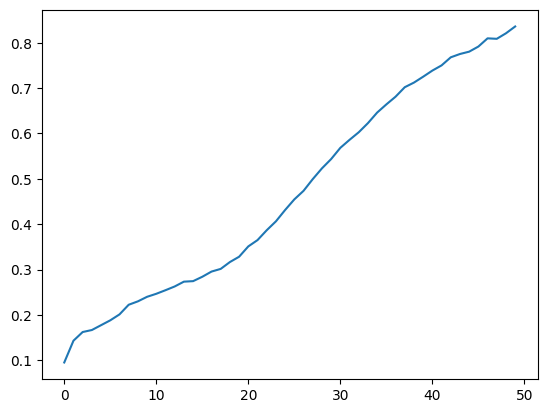

In [18]:
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'])

In [19]:
def predict_words(seed, no_words):
  for i in range(no_words):
    token_list = tokenizer.texts_to_sequences([seed])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_length-1, padding='pre')
    predicted = np.argmax(model.predict(token_list), axis=1)

    new_word = ''

    for word, index in tokenizer.word_index.items():
      if predicted == index:
        new_word = word
        break
    seed += " " + new_word
#     print(seed)
    if(i==no_words-1):
        return seed

In [20]:
seed_text = 'love'
next_words = 10
sentence = predict_words(seed_text, next_words)
words = sentence.split()
reversed_sentence = " ".join(words[::-1])
print(reversed_sentence)

1/1 [==============================] - 0s 37ms/step
voice from the black thou shalt be as fair as love


In [21]:
with open('simle_tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [22]:
tokenizer.word_index
max_seq_length

22

In [23]:
model.save('new_simile_generator.h5') # Will create a HDF5 file of the model